# 1. Import libraries


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 2. Get GitHub links from user input


In [2]:
def load_data_from_github(url):
    if "github.com" in url and "raw" not in url:
        url = url.replace("github.com", "raw.githubusercontent.com").replace("/blob/", "/")
    df = pd.read_csv(url)
    df.columns = df.columns.str.strip().str.lower().str.replace('.', '', regex=False)
    return df

# 3. Preprocess the dataset


In [3]:
def preprocess_data(df):
    df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')
    df = df.dropna(subset=['date', 'close'])
    df = df.sort_values('date')
    df['days'] = (df['date'] - df['date'].min()).dt.days
    df['close'] = pd.to_numeric(df['close'], errors='coerce')
    df = df.dropna(subset=['close'])
    return df[['date', 'days', 'close']]

# 4. Train and predict using models


In [9]:
def train_and_predict_models(X_train, y_train, X_test):
    results = {}

    # Linear Regression
    linear_model = LinearRegression().fit(X_train, y_train)
    results['Linear Regression'] = linear_model.predict(X_test)

    # Polynomial Regression (degree 3)
    poly = PolynomialFeatures(degree=3)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    poly_model = LinearRegression().fit(X_poly_train, y_train)
    results['Polynomial Regression'] = poly_model.predict(X_poly_test)

    return results

# 5. Visualizations


In [5]:
def plot_predictions(dates, actual, predictions, title):
    plt.figure(figsize=(14, 6))
    plt.plot(dates, actual, label='Actual Close', color='black', linewidth=2)
    for name, pred in predictions.items():
        plt.plot(dates, pred, label=name)
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 6. Run the pipeline

Enter GitHub link for past 6-month dataset: https://github.com/Saisabari-creator/Naan-Mudhalvan/blob/db5288d6b0f8826e3e8b842927911b9416a5bbbc/TATASTEEL-EQ-02-05-2024-to-02-11-2024.csv
Enter GitHub link for 1-year current dataset: https://github.com/Saisabari-creator/Naan-Mudhalvan/blob/db5288d6b0f8826e3e8b842927911b9416a5bbbc/TATASTEEL-EQ-02-05-2024-to-02-05-2025.csv


<ipython-input-3-6f6a875c4ad4>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')
<ipython-input-3-6f6a875c4ad4>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')


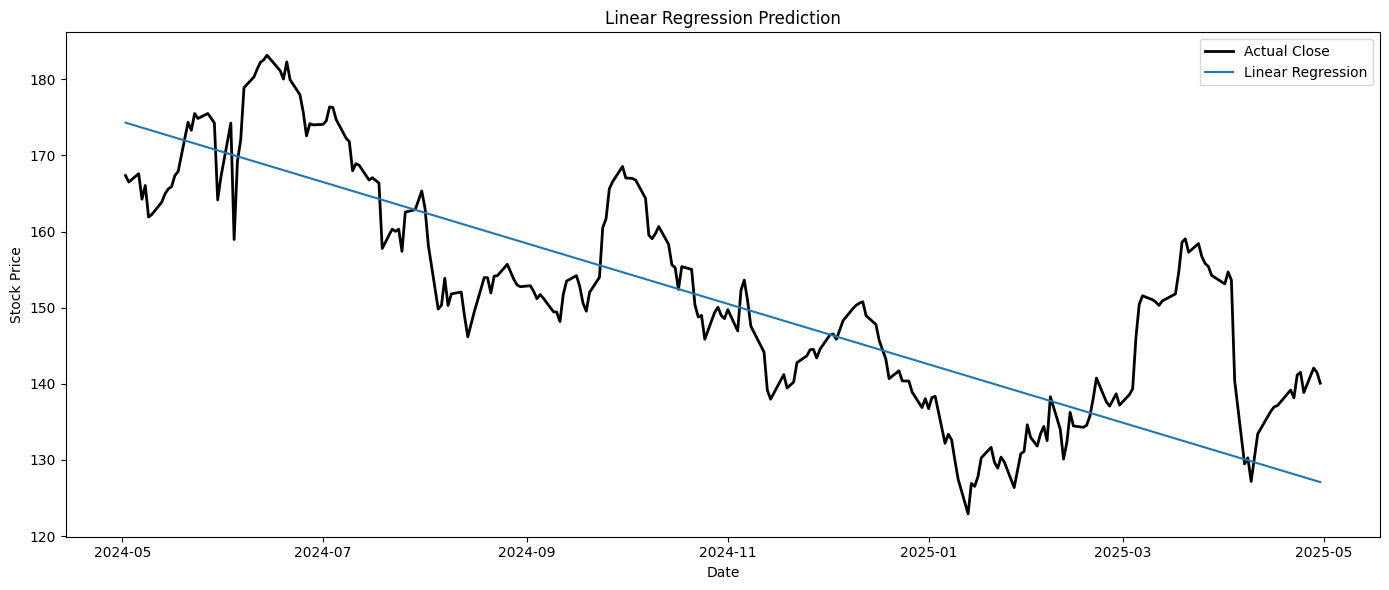

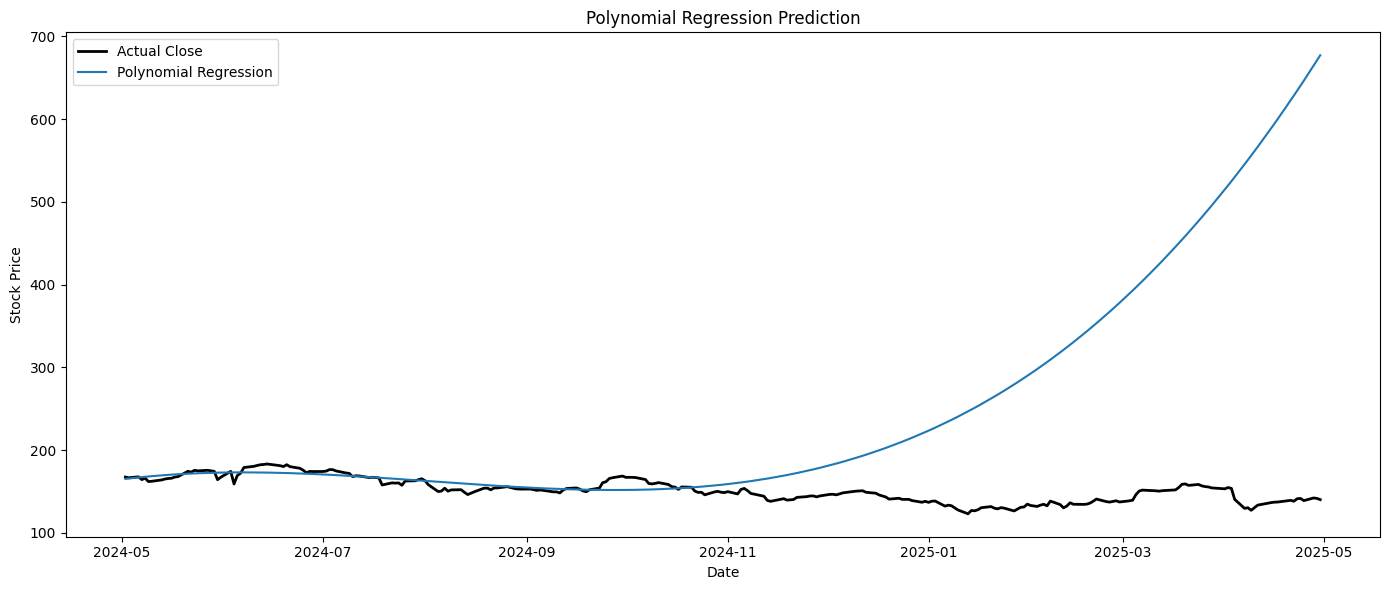

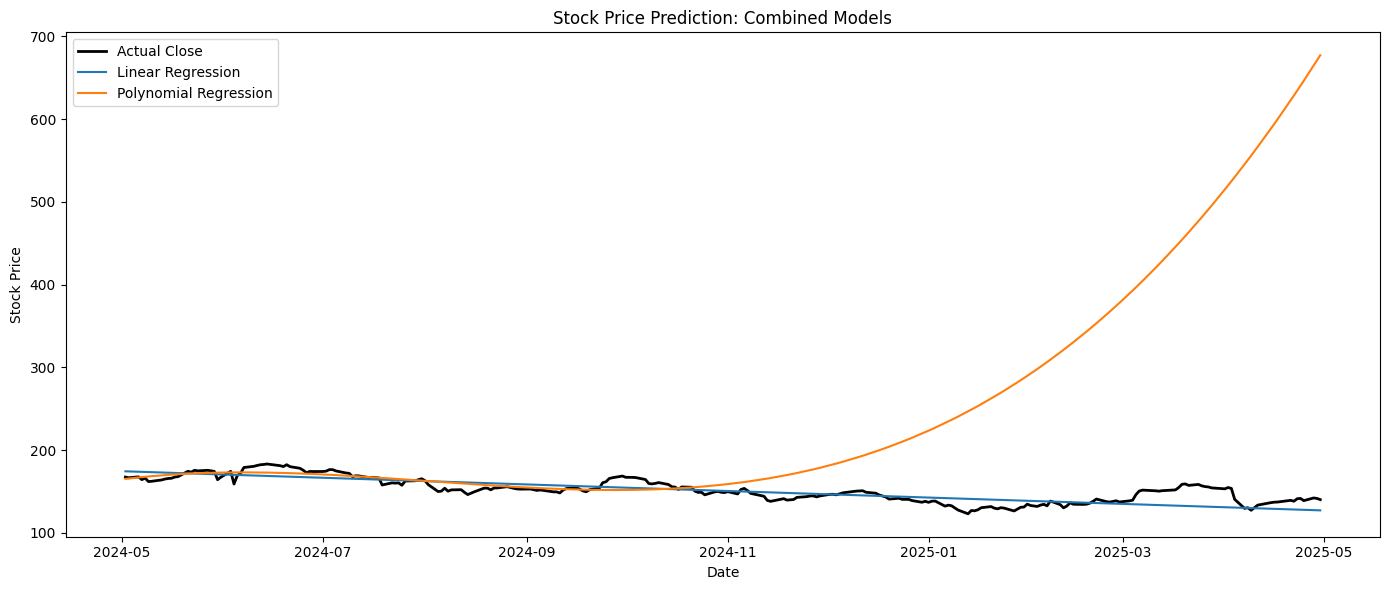

In [12]:
past_url = input("Enter GitHub link for past 6-month dataset: ").strip()
current_url = input("Enter GitHub link for 1-year current dataset: ").strip()

past_df = preprocess_data(load_data_from_github(past_url))
current_df = preprocess_data(load_data_from_github(current_url))

X_train = past_df[['days']]
y_train = past_df['close']
X_test = current_df[['days']]
dates = current_df['date']

model_predictions = train_and_predict_models(X_train, y_train, X_test)

current_df = current_df.copy()
for name in model_predictions:
    current_df[name] = model_predictions[name]

# Plot each model separately
plot_predictions(dates, current_df['close'], {'Linear Regression': current_df['Linear Regression']}, "Linear Regression Prediction")
plot_predictions(dates, current_df['close'], {'Polynomial Regression': current_df['Polynomial Regression']}, "Polynomial Regression Prediction")


# Combined plot
plot_predictions(dates, current_df['close'], {
    'Linear Regression': current_df['Linear Regression'],
    'Polynomial Regression': current_df['Polynomial Regression'],
}, "Stock Price Prediction: Combined Models")